## Lab Notebook - Rift Inversion Project
This Jupyter notebooks serves as a record of modeling runs done on Stampede2 as part of the rift inversion project. Each cell includes a note of the current modeling goal and the code to generate the resulting models, as well as a report on the model results.

__NOTE__: Never run all cells, model inputs are designed to be temporary

In [2]:
import ripropagate

# Key function: generate
# Parameters in generate: lthick,evel,etime,output,ver

### 8/2/21 ###
* 1e19 and 1e20 viscosity models finished running on Stampede2. 1e19 models both had errors (one convergence, one something else) after ~10 Myr. 1e20 models timed out after about ~13 Myr at 48 hours. No sign of weird field mixing in the results. Having diff creep in the mantle lithosphere doesn't seem to make a major impact.
* Still running 1e18 models for comparison
* Changed base prm file to have corrected Boundary temperature model, with 1573 set as the bottom temperature.
* Currently upgrading local system to dealii 9.3.0 and ASPECT 2.4.0-pre. Will do the same on Stampede2 once 1e18 models have finished.

### 8/4/21 ###
* 1e18 models finished as well. No convergence errors but only ran to about 7 Myr. No weird field mixing.
* Realized this whole set of models was accidentally run with max non-linear iterations at 1 instead of 100; have reverted that now, but not sure how it might have influenced results, especially speeds.
* Currently setting base model to minimum viscosity of 1e20 with diffusion creep in asthenosphere only. Added particle tracing following John's continental extension cookbook template.
* Stampede2 now upgraded to dealii 9.3.0 and ASPECT 2.4.0-pre, so future models being run on that. Still having issues getting it locally.
* Going to run a test of this new setup with time set to 0.

In [2]:
ripropagate.generate(etime=0,output='./080421_ri_test') 

* This seems to have worked ok once particle number was upped to 48e4. Going to try running this for real.

In [2]:
ripropagate.generate(etime=20,output='./080421_ri') 

### 8/5/21 ###
* This model crashed after about 2.5 Myr with an error with particle generation
* Need to check with John about this error. In the meantime, going to re-run a version of this model without particles for direct comparison (and the right number of nonlinear iterations).

In [4]:
ripropagate.generate(etime=0,output='./080521_ri_test',file='ri_base_nopart.prm') 

In [5]:
ripropagate.generate(etime=20,output='./080521_ri',file='ri_base_nopart.prm') 

### 8/6/21 ###
* 0805 model is still running, but going to try reducing the number of particles and allowing cells to not have particles

In [2]:
ripropagate.generate(etime=0,output='./080621_ri_test',file='ri_base.prm') 

### 8/9/21 ###
* This test failed, still got angry about cells without particles even though I tried to enable that. Seems in idev testing that changing interpolation to "cell average" may help.
* 0805 model is done and looks good - actually ran to completion (20 Myr) in less than 48 hours - due to 2.4 upgrade or lack of noninitial strain field?
* Cell average test (0806 ca) actually worked. Going to try running this to 20 Myr)

In [5]:
ripropagate.generate(etime=20,output='./080921_ri',file='ri_base.prm') 

### 8/11/21 ###
* Made some underlying Python code changes. Geotherm has now been moved to a function in the geophysics module of geoscripts. Composition has been added to ripropagate and so composition files will now be produced here in the notebooks. The "generate" function now also has the ability to change strain softening values with the parameter "soft."
* Going to try inverting the 0809 model to see how that works and if particle tracing stays consistent.
* Cell average particle interpolation not ideal, so may need to adjust that method in the future.

In [4]:
ripropagate.generate(etime=20,evel=-1,output='./081121_ri',soft=0.375) 

* Cell average particles model was really wonky. Cancelling the inversion for now.

### 8/12/21 ###
* Realized that these aren't passive particles, so need to have an adequate number. Going to revise particle number back to 48e4 but keep cell averaging to see if it avoids errors.
* Also going to invert the no particles model from last week to make sure diffusion creep working ok.

In [3]:
ripropagate.generate(etime=20,evel=-1,output='./081221_ri_a',file='ri_base_nopart.prm',soft=0.375,ver='a') 

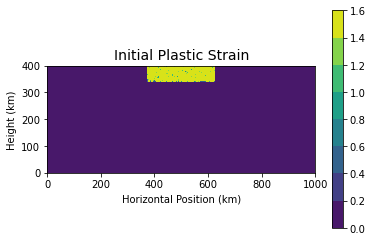

In [4]:
ripropagate.generate(etime=0,output='./081221_ri_b_test') 
ripropagate.comp_ascii(output='./081221_ri_b_test')

In [5]:
ripropagate.generate(etime=20,output='./081221_ri_b',ver='b') 